In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
np.random.seed(42)
data = np.random.randn(100).cumsum()
ts = pd.Series(data, index=pd.date_range(start='2020-01-01', periods=len(data), freq='D'))
print(ts.head())

2020-01-01    0.496714
2020-01-02    0.358450
2020-01-03    1.006138
2020-01-04    2.529168
2020-01-05    2.295015
Freq: D, dtype: float64


In [4]:
def test_stationarity(timeseries):
    result = adfuller(timeseries)
    print('Statystyka testowa: %f' % result[0])
    print('p-wartosc: %f' %result[1])
    if result[0] < result[4]['5%']:
        print('Szereg czasowy jest stacjonarny')
    else:
        print('Szereg czasowy nie jest stacjonarny')

test_stationarity(ts)

Statystyka testowa: -1.358332
p-wartosc: 0.602081
Szereg czasowy nie jest stacjonarny


In [5]:
def plot_acf_pacf(timeseries):
    lag_acf = acf(timeseries, nlags=20)
    lag_pacf = pacf(timeseries, nlags=20, method='ols')

    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.title('Autokorelacja (ACF)')

    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0, linestyle='--', color='gray')
    plt.title('Autokorelacja Czastkowa (ACF)')
    plt.tight_layout()

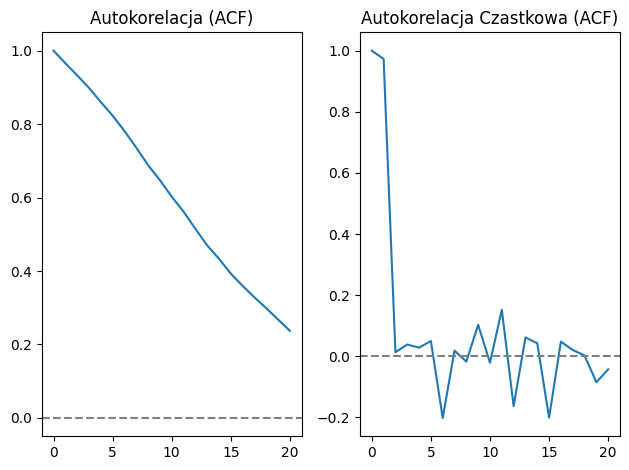

In [6]:
plot_acf_pacf(ts)

In [9]:
model_auto = auto_arima(ts, start_p=0, start_q=0,
                        test='adf',
                        max_p=20, max_q=20,
                        m=7,
                        d=None,
                        seasonal=False,
                        trace=True,
                        error_action='ignore',
                        suppress_warnings=True,
                        stepwise=True)

print(model_auto.summary())

C:\Users\AmanP\PycharmProjects\PodstawyPython\github\.venv\lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=265.435, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=267.390, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=267.385, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=264.881, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=269.226, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.231 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -131.440
Date:                Fri, 05 Sep 2025   AIC                            264.881
Time:                        11:45:05   BIC                            267.476
Sample:                    01-01-2020   HQIC                           265.931
                         - 04-09-2020                                         
Co

In [11]:
p=0
d=1
q=0
model = ARIMA(ts, order=(p,d,q))
results = model.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -131.440
Date:                Fri, 05 Sep 2025   AIC                            264.881
Time:                        11:48:09   BIC                            267.476
Sample:                    01-01-2020   HQIC                           265.931
                         - 04-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.8332      0.121      6.883      0.000       0.596       1.070
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.83   Pr

In [13]:
data = pd.read_csv('Electric_Production.csv')

In [14]:
data.head()

,observation_date,IPG2211A2N
0,1939-01-01,3.3336
1,1939-02-01,3.3591
2,1939-03-01,3.4354
3,1939-04-01,3.4608
4,1939-05-01,3.4608


In [17]:
data = data.set_index('observation_date')

In [18]:
data.head()

,IPG2211A2N
observation_date,
1939-01-01,3.3336
1939-02-01,3.3591
1939-03-01,3.4354
1939-04-01,3.4608
1939-05-01,3.4608
